In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [35]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [0]:
# load Data
data = pd.read_csv('/content/drive/My Drive/reddit-data-cleaned.csv')

In [3]:
data.head()

,title,score,body,url,num_comments,comments,flair,id
0,delhi govt source names cm arvind kejriwal dep...,302,NaN,ani status,30,beyond petty inclusion delhi government school...,Scheduled,f7ogd8
1,delhi ap singh advocate delhi gang rape convic...,17,NaN,ani status,22,hunch guy try expose loophole legal system nev...,Scheduled,flgvah
2,supreme court verdict sc st quota create polit...,106,NaN,scroll article supreme courts verdict sc st qu...,47,muslim reservation two distraction use indian ...,Scheduled,f1o839
3,entrance exam schedule may,9,clat ailet neet jee postpone two week would ab...,india comments fvcvo entrance exams scheduled may,3,bachega india tabhi toh padhega india gand mar...,Scheduled,fvcvo1
4,advisory schedule international mercial passen...,36,NaN,pib india status,4,oh boy chalo bhaisahab sabji ka dukaan main da...,Scheduled,fl8zf5


## **1. Bag of words Model on conventional ML algorithms**
---
- We cannot input text directly to machine learning models. We need to convert the text to a vector of numbers, this step is called **Feature extraction**
  
    
- For this we are going to use B.O.W (Bag of words) model, It focuses only on the occurence of words. The sentence structure, context, order of words is lost in B.O.W model.


- First we will convert each document in corpus to TF-IDF vector

  
- We will input these vectors to Machine Learning models like Naive-Bayes, Support-Vector-Machine, Logistic-Regression, Random-Forest 



### **Preparing data for model**
---

- It is possible that some features from the dataset may perform better than others. For instance, Only using **Title** for our model may give better accuracy than using only **url**, or maybe a combination of such features might result in a better accuracy. 

  
- this is hard to guess at the moment, so I plan to try out different combinations of inputs from the dataset to get the best accuracy:- Title, url, comments, (Title + url + comments), (Title + url) , etc.

  
- lets see which performs the best, we will use those features in our final model.


In [0]:
def prepare_data(columns):
    # Prepares Train and test sets for models
        
    if len(columns) > 2:
        df = data[columns].fillna("")
        columns.remove('flair')
        X = df[columns].apply(lambda x : ' '.join(x),axis = 1)                     
       
    else :
        df = data[columns].dropna()
        X = df[columns[0]]
        
    X = X.values          # X - input
    
    le = LabelEncoder()
    Y = le.fit_transform(df['flair'])    # Y - target_labels
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)   # ( 85 : 15 )
    return (X_train, X_test, y_train, y_test)

### **1.1 Title**

In [6]:
# Extracting 'Title' from dataset
(X_train, X_test, y_train, y_test) = prepare_data(['title','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1892,)
y_train shape  =  (1892,)
X_test shape  =  (335,)
y_test shape  =  (335,)


### Data is ready now we'll apply it to different classifiers
---
1. Linear SVC
2. Naive - Bayes
3. Logistic Regression
4. Random Forest classifier

In [7]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.2)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 0.9)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100,max_depth=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        # tf-idf vectorisation
                    (clf[0],clf[1])                                            # estimator
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.7194029850746269

Naive - Bayes   ----->   0.7074626865671642

LogisticRegression   ----->   0.746268656716418

Random Forest Classifier   ----->   0.7134328358208956



### **1.2 URL** 

In [8]:
# Extracting url column from dataset
(X_train, X_test, y_train, y_test) = prepare_data(['url','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1890,)
y_train shape  =  (1890,)
X_test shape  =  (334,)
y_test shape  =  (334,)


In [9]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.7)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 25,solver='saga',penalty='l1',multi_class='multinomial')) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100,max_depth=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.5269461077844312

Naive - Bayes   ----->   0.4431137724550898



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression   ----->   0.5239520958083832

Random Forest Classifier   ----->   0.5



### **1.3 Comments**

In [10]:
(X_train, X_test, y_train, y_test) = prepare_data(['comments','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1706,)
y_train shape  =  (1706,)
X_test shape  =  (302,)
y_test shape  =  (302,)


In [11]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=1)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 10)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.5132450331125827

Naive - Bayes   ----->   0.4105960264900662



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression   ----->   0.49337748344370863

Random Forest Classifier   ----->   0.423841059602649



### **1.4 Title + url**

In [12]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','url','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1892,)
y_train shape  =  (1892,)
X_test shape  =  (335,)
y_test shape  =  (335,)


In [13]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.7)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 0.9)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.7283582089552239

Naive - Bayes   ----->   0.6925373134328359

LogisticRegression   ----->   0.7283582089552239

Random Forest Classifier   ----->   0.7074626865671642



### **1.5 Title + comments**

In [30]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','comments','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1892,)
y_train shape  =  (1892,)
X_test shape  =  (335,)
y_test shape  =  (335,)


In [31]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.6)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 9,max_iter = 150)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.7432835820895523

Naive - Bayes   ----->   0.5671641791044776

LogisticRegression   ----->   0.7194029850746269

Random Forest Classifier   ----->   0.7134328358208956



### **1.6 Title + body**

In [22]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','body','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1892,)
y_train shape  =  (1892,)
X_test shape  =  (335,)
y_test shape  =  (335,)


In [29]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.7)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 9,max_iter = 200)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.8238805970149253

Naive - Bayes   ----->   0.6716417910447762

LogisticRegression   ----->   0.7970149253731343

Random Forest Classifier   ----->   0.7611940298507462



### **1.7 Title + comments + url**


In [32]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','url','comments','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1892,)
y_train shape  =  (1892,)
X_test shape  =  (335,)
y_test shape  =  (335,)


In [17]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=3)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 9,max_iter = 150)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test)
    accuracy = np.sum(predicted == y_test)/len(y_test)
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.7761194029850746

Naive - Bayes   ----->   0.5940298507462687



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression   ----->   0.7343283582089553

Random Forest Classifier   ----->   0.7134328358208956



###  **1.8 Title + body + url**

In [33]:
(X_train, X_test, y_train, y_test) = prepare_data(['title','body','url','flair'])
print("X_train shape  = ",X_train.shape)
print("y_train shape  = ",y_train.shape)
print("X_test shape  = ",X_test.shape)
print("y_test shape  = ",y_test.shape)

X_train shape  =  (1892,)
y_train shape  =  (1892,)
X_test shape  =  (335,)
y_test shape  =  (335,)


In [34]:
classifiers = [ ('LinearSVC',LinearSVC(loss='hinge',C=0.7)) , ('Naive - Bayes',MultinomialNB() ),('LogisticRegression' ,LogisticRegression(C = 9,max_iter = 200)) ,('Random Forest Classifier' ,RandomForestClassifier(n_estimators=100)) ]
for clf in classifiers:
    
    text_clf = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))),        
                    (clf[0],clf[1])                                            
                   ])
    
    text_clf.fit(X_train,y_train)
    predicted =  text_clf.predict(X_test) 
    accuracy = np.sum(predicted == y_test)/len(y_test) # t = b = u
    print(clf[0],'  ----->  ',accuracy,end = '\n\n')

LinearSVC   ----->   0.8238805970149253

Naive - Bayes   ----->   0.6716417910447762

LogisticRegression   ----->   0.7970149253731343

Random Forest Classifier   ----->   0.7880597014925373



#### ***Models perform the best when we use features ( Title + Body + url )***
- Now we will explore deep-learning approaches for text classification



# ***2. Deep Learning Models***
- We will be considering the following deep learning methods for text classification
 1. CNN + Word Embeddings
 2. LSTMs
 3. Stacked LSTMS
 4. Bidirectional LSTMs
 5. Hybrid Model --> (CNN + LSTM)

In [0]:
# Creating embeddings dictionary
embeddings_dict = {}
with open('/content/drive/My Drive/glove.6B.50d.txt') as f: 
    for line in f:
        word = line.split()[0]
        embeddings_dict[word] = np.array(line.split()[1:],dtype = 'float')

In [0]:
def create_data_for_model(max_len , vocab_size = 'None'):
      (X_train, X_test, y_train, y_test) = prepare_data(['title','body','url','flair'])
      tk = Tokenizer()
      tk.fit_on_texts(X_train)
      if vocab_size != 'None':
        tk.word_index = {w:i for w,i in tk.word_index.items() if i <= vocab_size}
      else:
        vocab_size = len(tk.word_index)

      # Train Data - X
      encoded_train = tk.texts_to_sequences(X_train)
      padded_train = pad_sequences(encoded_train,maxlen = max_len, padding = 'post' , truncating = 'post')

      # Test Data  - X
      encoded_test = tk.texts_to_sequences(X_test)
      padded_test = pad_sequences(encoded_test,maxlen = max_len,padding = 'post', truncating = 'post')

      # Train Data - Y
      one_hot = OneHotEncoder()
      y_train = y_train.reshape((-1,1))
      y_train = one_hot.fit_transform(y_train).toarray()

      # Create embeddings matrix
      embeddings_matrix = np.zeros((vocab_size+1,50)) 
      for word,index in tk.word_index.items():
        if embeddings_dict.get(word) is not None:
          embeddings_matrix[index] = embeddings_dict[word]
     
      return (padded_train, y_train, padded_test, y_test, embeddings_matrix, vocab_size)


## ***2.1 CNN + Word Embeddings***
- (**Yoav Goldberg**, in his primer on deep learning for nlp, 2015) , comments that CNNs are effective at Text Classification because of their capability to extract important features  (like tokens or sequence of tokens) regardless of their position in text.

- He also comments, in text classification, the main idea is to learn words or a group of words that are good indicators of a topic, we do not necessarily care where they might appear in a document. Convolutions and pooling layers allow model to learn such local indicators invariant to their position.
---
1. For each training example, we will extract word embedding vectors (Glove vectors).
2. we will feed this as input to CNN model, Our hope is that CNN model will learn some useful filters. A useful filter might be one , that has a similar embedding vector to the vector of a distinguishing word.



In [0]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix, vocab_len) = create_data_for_model(max_len = 300)
def cnn_model(max_len, vocab_size):  
  pooling_layers = []
  inp = Input((max_len,))
  embedding_layer = Embedding(input_dim= vocab_size + 1,output_dim=50,weights = [embeddings_matrix],trainable = True)(inp)
  dp = Dropout(0.3)(embedding_layer)

  x1 = Conv1D(filters=36,kernel_size=1,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len,stride = 1)(x1))

  x2 = Conv1D(filters=36,kernel_size=2,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 1,stride = 1)(x2))

  x3 = Conv1D(filters=36,kernel_size=3,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 2,stride = 1)(x3))

  x4 = Conv1D(filters=36,kernel_size=4,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 3,stride = 1)(x4))

  x5 = Conv1D(filters=36,kernel_size=5,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 4,stride = 1)(x5))

  z = Concatenate(axis = 1)(pooling_layers)
  z = Flatten()(z)
  #z = Dropout(0.3)(z)

  
  y = Dense(16,activation = 'relu')(z)

  out = Dense(11,activation = 'softmax')(y)


  model = Model(inputs = inp,outputs = out)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [15]:
model = cnn_model(max_len = 300,vocab_size = vocab_len)
history = model.fit(padded_train,y_train, epochs = 200, batch_size = 32, validation_split = 0.15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=300, strides=1)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=299, strides=1)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=298, strides=1)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=297, strides=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=296, strides=1)`


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 300, 50)      1018350     input_2[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 300, 50)      0           embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 300, 36)      1836        dropout_2[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1608 samples, validate on 284 samples
Epoch 1/200
1608/1608 [==============================] - 1s 496us/step - loss: 2.4504 - accuracy: 0.1312 - val_loss: 2.2719 - val_accuracy: 0.1373
Epoch 2/200
1608/1608 [==============================] - 0s 280us/step - loss: 2.2115 - accuracy: 0.2264 - val_loss: 2.1212 - val_accuracy: 0.2324
Epoch 3/200
1608/1608 [==============================] - 0s 276us/step - loss: 2.0288 - accuracy: 0.3072 - val_loss: 1.8879 - val_accuracy: 0.3556
Epoch 4/200
1608/1608 [==============================] - 0s 284us/step - loss: 1.7626 - accuracy: 0.4042 - val_loss: 1.5765 - val_accuracy: 0.4085
Epoch 5/200
1608/1608 [==============================] - 0s 279us/step - loss: 1.4507 - accuracy: 0.5398 - val_loss: 1.2308 - val_accuracy: 0.5845
Epoch 6/200
1608/1608 [==============================] - 0s 281us/step - loss: 1.1692 - accuracy: 0.6200 - val_loss: 1.0139 - val_accuracy: 0.7007
Epoch 7/200
1608/1608 [==============================] - 0s 277us/step 

In [16]:

predicted = model.predict(padded_test)
predicted_labels = np.argmax(predicted,axis = 1)
acc = np.sum(predicted_labels == y_test)/len(y_test)
print(acc)

0.8328358208955224


0.8388059701492537 - max_len = 300 vocab - 21000


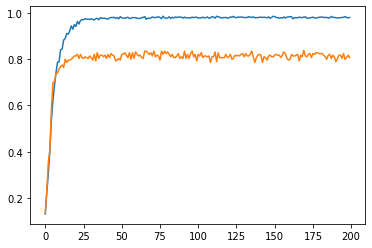

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

0.8119402985074626 - The best till now 

# **2. LSTM**
- The idea behind using LSTMs is to capture 
![hf](https://github.com/mananm98/image_captioning/blob/master/images/Unknown-2.jpg?raw=true)




*   LSTM slow to train larger max_len cannot say about vocab size no improvement from 9000 to 21000
*   will try on max_len = 300



In [7]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix,vocab_len) = create_data_for_model(vocab_size = 12000, max_len = 35)

NameError: ignored

In [0]:

# Model
def model_lstm(max_len,vocab_size):
  inp1 = Input((max_len,))
  embedding_layer = Embedding(input_dim=vocab_size + 1,output_dim= 50,mask_zero=True,weights = [embeddings_matrix],trainable = False)(inp1)
  drop_out1 = Dropout(0.3)(embedding_layer)
  lstm_layer1 = LSTM(32,return_sequences = False)(drop_out1)


  #drop_out = Dropout(0.3)(lstm_layer1)
  out1 = Dense(11,activation='softmax')(lstm_layer1)

  model_lstm = Model(inputs = inp1,outputs = out1)
  model_lstm.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model_lstm.summary()
  return model_lstm

In [77]:
model = model_lstm(35,12000)
hist = model.fit(padded_train,y_train,epochs = 30, batch_size=16,validation_split = 0.15)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 35)                0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 35, 50)            600050    
_________________________________________________________________
dropout_12 (Dropout)         (None, 35, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_21 (Dense)             (None, 11)                363       
Total params: 611,037
Trainable params: 10,987
Non-trainable params: 600,050
_________________________________________________________________
Train on 1608 samples, validate on 284 samples
Epoch 1/30
1608/1608 [==============================] - 14s 9ms/st

In [78]:
predicted = model.predict(padded_test)
predicted_labels = np.argmax(predicted,axis = 1)
acc = np.sum(predicted_labels == y_test)/len(y_test)
print(acc)

0.6805970149253732


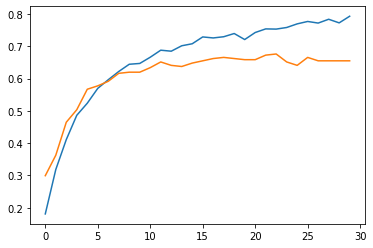

In [79]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

## **3. Stacked LSTMs**

In [0]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix) = create_data_for_model(vocab_size = 12000, max_len = 35)

In [0]:
def stackced_lstms(max_len,vocab_size):
  inp1 = Input((max_len,))
  embedding_layer = Embedding(input_dim=vocab_size + 1,output_dim= 50,mask_zero=True,weights = [embeddings_matrix],trainable = False)(inp1)
  drop_out1 = Dropout(0.3)(embedding_layer)
  lstm_layer1 = LSTM(64,return_sequences = True)(drop_out1)
  lstm_layer2 = LSTM(64,return_sequences = False)(lstm_layer1)


  #drop_out = Dropout(0.3)(lstm_layer1)
  out1 = Dense(11,activation='softmax')(lstm_layer2)

  model_lstm_stacked = Model(inputs = inp1,outputs = out1)
  model_lstm_stacked.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model_lstm_stacked.summary()
  return model_lstm_stacked

In [84]:
model_lstm_stacked = stacked_lstms(35,12000)
hist = model_lstm_stacked.fit(padded_train,y_train,epochs = 30, batch_size=8,validation_split = 0.15)

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 35)                0         
_________________________________________________________________
embedding_16 (Embedding)     (None, 35, 50)            600050    
_________________________________________________________________
dropout_13 (Dropout)         (None, 35, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 35, 64)            29440     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_22 (Dense)             (None, 11)                715       
Total params: 663,229
Trainable params: 63,179
Non-trainable params: 600,050
_______________________________________________

In [1]:
predicted = model_lstm_stacked.predict(padded_test)
predicted_labels = np.argmax(predicted,axis = 1)
acc = np.sum(predicted_labels == y_test)/len(y_test)
print(acc)

NameError: ignored

# ***4. Bidirectional LSTM***

In [0]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix) = create_data_for_model(vocab_size = 12000, max_len = 35)

In [0]:
def model_bilstm(max_len,vocab_size):
  inp1 = Input((max_len,))
  embedding_layer = Embedding(input_dim=vocab_size + 1,output_dim= 50,mask_zero=True,weights = [embeddings_matrix],trainable = False)(inp1)
  drop_out1 = Dropout(0.3)(embedding_layer)
  lstm_layer1 = Bidirectional(LSTM(64,return_sequences = False))(drop_out1)


  #drop_out = Dropout(0.3)(lstm_layer1)
  out1 = Dense(11,activation='softmax')(lstm_layer1)

  model_bi_lstm = Model(inputs = inp1,outputs = out1)
  model_bi_lstm.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model_bi_lstm.summary()
  return model_bi_lstm

In [14]:
model_bi_lstm = model_bilstm(35,12000)
hist = model_bi_lstm.fit(padded_train,y_train,epochs = 30, batch_size=8,validation_split = 0.15)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 35)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 35, 50)            600050    
_________________________________________________________________
dropout_1 (Dropout)          (None, 35, 50)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               58880     
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1419      
Total params: 660,349
Trainable params: 60,299
Non-trainable params: 600,050
_________________________________________________________________
Train on 1608 samples, validate on 284 samples
Epoch 1/30
1608/1608 [==============================] - 51s 32ms/st

In [16]:
predicted = model_bi_lstm.predict(padded_test)
predicted_labels = np.argmax(predicted,axis = 1)
acc = np.sum(predicted_labels == y_test)/len(y_test)
print(acc)

0.7044776119402985


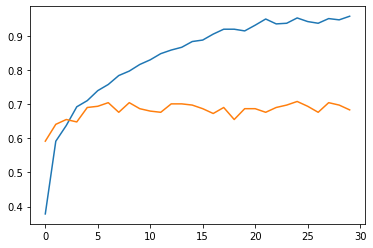

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

# **5. Hybrid  - CNN + LSTM**

In [0]:
(padded_train, y_train, padded_test, y_test, embeddings_matrix) = create_data_for_model(vocab_size = 12000, max_len = 35)

In [0]:
def create_hybrid_model(max_len,vocab_size):

  pooling_layers = []


  inp1 = Input((max_len,))
  embedding_layer = Embedding(input_dim=vocab_size + 1,output_dim= 50,mask_zero=False,weights = [embeddings_matrix],trainable = False)(inp1)
  dp = Dropout(0.3)(embedding_layer)

  x1 = Conv1D(filters=36,kernel_size=1,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 9,stride = 1)(x1))

  x2 = Conv1D(filters=36,kernel_size=2,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 10,stride = 1)(x2))

  x3 = Conv1D(filters=36,kernel_size=3,activation = 'relu')(dp)
  pooling_layers.append(MaxPool1D(pool_size=max_len - 11,stride = 1)(x3))

  z = Concatenate(axis = 2)(pooling_layers)
  z = Reshape(((108,-1)))(z)

  lstm_layer1 = (LSTM(100,return_sequences = False))(z)


  #drop_out = Dropout(0.3)(lstm_layer1)
  out1 = Dense(11,activation='softmax')(lstm_layer1)

  hybrid_model = Model(inputs = inp1,outputs = out1)
  hybrid_model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  hybrid_model.summary()
  return hybrid_model

In [28]:
hybrid_model = create_hybrid_model(35,12000)
hist = hybrid_model.fit(padded_train,y_train,epochs = 35, batch_size=8,validation_split = 0.15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=26, strides=1)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=25, strides=1)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=24, strides=1)`


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 35, 50)       600050      input_9[0][0]                    
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 35, 50)       0           embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 35, 36)       1836        dropout_7[0][0]                  
____________________________________________________________________________________________

In [29]:
predicted = hybrid_model.predict(padded_test)
predicted_labels = np.argmax(predicted,axis = 1)
acc = np.sum(predicted_labels == y_test)/len(y_test)
print(acc)

0.5671641791044776


In [0]:
def create_hybrid_model1(max_len,vocab_size):

  pooling_layers = []


  inp1 = Input((max_len,))
  embedding_layer = Embedding(input_dim=vocab_size + 1,output_dim= 50,mask_zero=False,weights = [embeddings_matrix],trainable = False)(inp1)
  dp = Dropout(0.3)(embedding_layer)

  x1 = Conv1D(filters=36,kernel_size=5,activation = 'relu')(dp)
  mp = MaxPool1D(pool_size=4,stride = 1)(x1)

  #x2 = Conv1D(filters=36,kernel_size=2,activation = 'relu')(dp)
  #pooling_layers.append(MaxPool1D(pool_size=max_len - 10,stride = 1)(x2))

  #x3 = Conv1D(filters=36,kernel_size=3,activation = 'relu')(dp)
  #pooling_layers.append(MaxPool1D(pool_size=max_len - 11,stride = 1)(x3))

  #z = Concatenate(axis = 2)(pooling_layers)
  #z = Reshape(((108,-1)))(z)

  lstm_layer1 = (LSTM(100,return_sequences = False))(mp)


  #drop_out = Dropout(0.3)(lstm_layer1)
  out1 = Dense(11,activation='softmax')(lstm_layer1)

  hybrid_model = Model(inputs = inp1,outputs = out1)
  hybrid_model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  hybrid_model.summary()
  return hybrid_model

In [31]:
hybrid_model = create_hybrid_model1(35,12000)
hist = hybrid_model.fit(padded_train,y_train,epochs = 35, batch_size=8,validation_split = 0.15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=4, strides=1)`
  # This is added back by InteractiveShellApp.init_path()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 35)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 35, 50)            600050    
_________________________________________________________________
dropout_8 (Dropout)          (None, 35, 50)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 31, 36)            9036      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 28, 36)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               54800     
_________________________________________________________________
dense_7 (Dense)              (None, 11)                1111

In [36]:
predicted = hybrid_model.predict(padded_test)
predicted_labels = np.argmax(predicted,axis = 1)
acc = np.sum(predicted_labels == y_test)/len(y_test)
print(acc)

0.6626865671641791


In [35]:
hybrid_model.fit(padded_train,y_train,epochs = 35, batch_size=8,validation_split = 0.15)

Train on 1608 samples, validate on 284 samples
Epoch 1/35
1608/1608 [==============================] - 17s 10ms/step - loss: 0.1457 - accuracy: 0.9403 - val_loss: 1.7806 - val_accuracy: 0.6655
Epoch 2/35
1608/1608 [==============================] - 16s 10ms/step - loss: 0.1222 - accuracy: 0.9552 - val_loss: 1.6950 - val_accuracy: 0.6831
Epoch 3/35
1608/1608 [==============================] - 17s 10ms/step - loss: 0.1643 - accuracy: 0.9391 - val_loss: 1.7950 - val_accuracy: 0.6585
Epoch 4/35
1608/1608 [==============================] - 17s 10ms/step - loss: 0.1653 - accuracy: 0.9447 - val_loss: 1.6943 - val_accuracy: 0.6761
Epoch 5/35
1608/1608 [==============================] - 16s 10ms/step - loss: 0.1541 - accuracy: 0.9440 - val_loss: 1.6101 - val_accuracy: 0.6866
Epoch 6/35
1608/1608 [==============================] - 16s 10ms/step - loss: 0.1435 - accuracy: 0.9515 - val_loss: 1.6901 - val_accuracy: 0.6655
Epoch 7/35
1608/1608 [==============================] - 16s 10ms/step - loss: